# Day 18: Lavaduct Lagoon
Thanks to your efforts, the machine parts factory is one of the first factories up and running since the lavafall came back. However, to catch up with the large backlog of parts requests, the factory will also need a large supply of lava for a while; the Elves have already started creating a large lagoon nearby for this purpose.

However, they aren't sure the lagoon will be big enough; they've asked you to take a look at the dig plan (your puzzle input). For example:
```
R 6 (#70c710)
D 5 (#0dc571)
L 2 (#5713f0)
D 2 (#d2c081)
R 2 (#59c680)
D 2 (#411b91)
L 5 (#8ceee2)
U 2 (#caa173)
L 1 (#1b58a2)
U 2 (#caa171)
R 2 (#7807d2)
U 3 (#a77fa3)
L 2 (#015232)
U 2 (#7a21e3)
```
The digger starts in a 1 meter cube hole in the ground. They then dig the specified number of meters up (U), down (D), left (L), or right (R), clearing full 1 meter cubes as they go. The directions are given as seen from above, so if "up" were north, then "right" would be east, and so on. Each trench is also listed with the color that the edge of the trench should be painted as an RGB hexadecimal color code.

When viewed from above, the above example dig plan would result in the following loop of trench (#) having been dug out from otherwise ground-level terrain (.):
```
#######
#.....#
###...#
..#...#
..#...#
###.###
#...#..
##..###
.#....#
.######
```
At this point, the trench could contain 38 cubic meters of lava. However, this is just the edge of the lagoon; the next step is to dig out the interior so that it is one meter deep as well:
```
#######
#######
#######
..#####
..#####
#######
#####..
#######
.######
.######
```
Now, the lagoon can contain a much more respectable 62 cubic meters of lava. While the interior is dug out, the edges are also painted according to the color codes in the dig plan.

The Elves are concerned the lagoon won't be large enough; if they follow their dig plan, how many cubic meters of lava could it hold?

In [1]:
def checkForLoop(inputfile):

    dirs = []
    lengths = []
    colours = []
    with open(inputfile) as f:
        for line in f:
            splitLine = line.strip().split(' ')
            dirs.append(splitLine[0])
            lengths.append(int(splitLine[1]))
            colours.append(splitLine[2][1:7])
    x, y = 0, 0
    for i in range(len(dirs)):
        if dirs[i] == 'R':
            x += lengths[i]
        if dirs[i] == 'L':
            x -= lengths[i]
        if dirs[i] == 'D':
            y += lengths[i]
        if dirs[i] == 'U':
            y -= lengths[i]
    print(x)
    print(y)

In [2]:
checkForLoop("example-input.txt")

0
0


In [4]:
checkForLoop("input.txt")

0
0


In [45]:
def getWindow(dirs, lengths):
    x, y, min_x, min_y, max_x, max_y = 0, 0, 0, 0, 0, 0
    for i in range(len(dirs)):
        if dirs[i] == 'R':
            x += lengths[i]
            max_x = max(x, max_x)
        if dirs[i] == 'L':
            x -= lengths[i]
            min_x = min(x, min_x)
        if dirs[i] == 'D':
            y += lengths[i]
            max_y = max(y, max_y)
        if dirs[i] == 'U':
            y -= lengths[i]
            min_y = min(y, min_y)
    return min_x, min_y, max_x, max_y

def getWindowFormFile(inputfile):
    dirs = []
    lengths = []
    colours = []
    with open(inputfile) as f:
        for line in f:
            splitLine = line.strip().split(' ')
            dirs.append(splitLine[0])
            lengths.append(int(splitLine[1]))
            colours.append(splitLine[2][1:7])
    return getWindow(dirs, lengths)

In [6]:
getWindowFormFile("example-input.txt")

(0, 0, 6, 9)

In [7]:
getWindowFormFile("input.txt")

(-57, -192, 329, 71)

In [8]:
def digMap(inputfile):

    dirs = []
    lengths = []
    colours = []
    with open(inputfile) as f:
        for line in f:
            splitLine = line.strip().split(' ')
            dirs.append(splitLine[0])
            lengths.append(int(splitLine[1]))
            colours.append(splitLine[2][1:7])
        
    min_x, min_y, max_x, max_y = getWindow(dirs, lengths)
    x, y = - min_x, -min_y
    map = [['.' for _ in range(max_x - min_x + 1)] for _ in range(max_y - min_y + 1)]
    for i in range(len(dirs)):
        if dirs[i] == 'R':
            for j in range(x + 1, x+ lengths[i] + 1):
                map[y][j] = '#'
            x += lengths[i]
        if dirs[i] == 'L':
            for j in range(x - 1, x- lengths[i] - 1, -1):
                map[y][j] = '#'
            x -= lengths[i]
        if dirs[i] == 'D':
            for j in range(y + 1, y+ lengths[i] + 1):
                map[j][x] = '#'
            y += lengths[i]
        if dirs[i] == 'U':
            for j in range(y - 1, y- lengths[i] - 1, -1):
                map[j][x] = '#'
            y -= lengths[i]
    return map

In [70]:
from PIL import Image

def getDigMapImage(filename, pixel_size):
    map = digMap(filename)
    binary_list = []
    for line in map:
        s = ""
        for point in line:
            if point == '.':
                s += '0'
            else:
                s += '1'
        binary_list.append(s)

    # Convert '0' and '1' strings to a 2D list of integers
    binary_matrix = [[int(bit) for bit in row] for row in binary_list]

    # Create an image
    image_size = (len(binary_matrix[0]) * pixel_size, len(binary_matrix) * pixel_size)
    image = Image.new('1', image_size, 1)  # '1' mode for 1-bit pixels (black and white)

    # Draw pixels based on the binary matrix
    for y, row in enumerate(binary_matrix):
        for x, bit in enumerate(row):
            color = 0 if bit == 1 else 1  # 0 for '1' (black), 1 for '0' (white)
            for i in range(pixel_size):
                for j in range(pixel_size):
                    image.putpixel((x * pixel_size + i, y * pixel_size + j), color)

    # Save the image
    return image

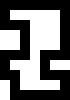

In [10]:
getDigMapImage("example-input.txt",10)

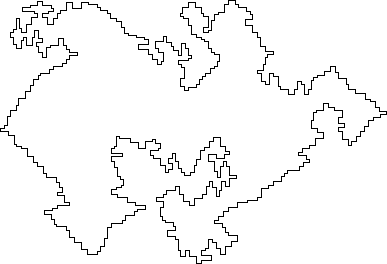

In [11]:
getDigMapImage("input.txt",1)

In [15]:
from tqdm import tqdm

def result(inputfile):
    map = digMap(inputfile)
    length = len(map)
    width = len(map[0])
    visited = []
    next = [[0, i] for i in range(width)] + [[length - 1, i] for i in range(width)] + [[i, 0] for i in range(1,length-1)] + [[i, width -1] for i in range(1,length-1)]
    progress_bar = tqdm(total=len(next), desc="Countdown", unit="iteration")
    while(len(next) > 0):
        point = next.pop(0)
        if point not in visited and map[point[0]][point[1]] == '.':
            visited.append(point)
            for shift in [[1,0],[-1,0],[0,1],[0,-1]]:
                y = point[0] + shift[0]
                x = point[1] + shift[1]
                nextPoint = [y,x]
                if (0 <= x < width) and (0 <= y < length) and (nextPoint not in visited) and (nextPoint not in next) and (map[y][x] == '.'):
                    next.append(nextPoint)
        progress_bar.update(1)
        progress_bar.set_postfix({"Current value": len(next)})
    progress_bar.close()
    return length * width - len(visited)


In [16]:
result("example-input.txt")

Countdown: 33iteration [00:00, 2864.55iteration/s, Current value=0]                  


62

In [17]:
result("input.txt")

Countdown: 2980iteration [00:02, 1088.96iteration/s, Current value=1228]                   IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Countdown: 52612iteration [02:40, 327.99iteration/s, Current value=0]   


49578

### Part Two
The Elves were right to be concerned; the planned lagoon would be much too small.

After a few minutes, someone realizes what happened; someone swapped the color and instruction parameters when producing the dig plan. They don't have time to fix the bug; one of them asks if you can extract the correct instructions from the hexadecimal codes.

Each hexadecimal code is six hexadecimal digits long. The first five hexadecimal digits encode the distance in meters as a five-digit hexadecimal number. The last hexadecimal digit encodes the direction to dig: 0 means R, 1 means D, 2 means L, and 3 means U.

So, in the above example, the hexadecimal codes can be converted into the true instructions:
```
#70c710 = R 461937
#0dc571 = D 56407
#5713f0 = R 356671
#d2c081 = D 863240
#59c680 = R 367720
#411b91 = D 266681
#8ceee2 = L 577262
#caa173 = U 829975
#1b58a2 = L 112010
#caa171 = D 829975
#7807d2 = L 491645
#a77fa3 = U 686074
#015232 = L 5411
#7a21e3 = U 500254
```
Digging out this loop and its interior produces a lagoon that can hold an impressive 952408144115 cubic meters of lava.

Convert the hexadecimal color codes into the correct instructions; if the Elves follow this new dig plan, how many cubic meters of lava could the lagoon hold?

In [1]:
dirMap = {
    '0': 'R',
    '1': 'D',
    '2': 'L',
    '3': 'U'
}

def checkForLoop2(inputfile):

    dirs = []
    lengths = []
    with open(inputfile) as f:
        for line in f:
            splitLine = line.strip().split(' ')
            lengths.append(int(splitLine[2][2:7],16))
            dirs.append(dirMap[splitLine[2][7]])
    x, y = 0, 0
    for i in range(len(dirs)):
        if dirs[i] == 'R':
            x += lengths[i]
        if dirs[i] == 'L':
            x -= lengths[i]
        if dirs[i] == 'D':
            y += lengths[i]
        if dirs[i] == 'U':
            y -= lengths[i]
    print(x)
    print(y)

In [2]:
checkForLoop2("example-input.txt")

0
0


In [3]:
checkForLoop2("input.txt")

0
0


In [136]:
def result2(inputfile):

    # dirs = []
    # lengths = []
    # colours = []
    # with open(inputfile) as f:
    #     for line in f:
    #         splitLine = line.strip().split(' ')
    #         dirs.append(splitLine[0])
    #         lengths.append(int(splitLine[1]))
    #         colours.append(splitLine[2][1:7])

    dirs = []
    lengths = []
    with open(inputfile) as f:
        for line in f:
            splitLine = line.strip().split(' ')
            lengths.append(int(splitLine[2][2:7],16))
            dirs.append(dirMap[splitLine[2][7]])

    # def getMap():
    #     min_x, min_y, max_x, max_y = getWindow(dirs, lengths)
    #     x, y = - min_x, -min_y
    #     map = [['.' for _ in range(max_x - min_x + 1)] for _ in range(max_y - min_y + 1)]
    #     for i in range(len(dirs)):
    #         if dirs[i] == 'R':
    #             for j in range(x + 1, x+ lengths[i] + 1):
    #                 map[y][j] = '#'
    #             x += lengths[i]
    #         if dirs[i] == 'L':
    #             for j in range(x - 1, x- lengths[i] - 1, -1):
    #                 map[y][j] = '#'
    #             x -= lengths[i]
    #         if dirs[i] == 'D':
    #             for j in range(y + 1, y+ lengths[i] + 1):
    #                 map[j][x] = '#'
    #             y += lengths[i]
    #         if dirs[i] == 'U':
    #             for j in range(y - 1, y- lengths[i] - 1, -1):
    #                 map[j][x] = '#'
    #             y -= lengths[i]
    #     return map
    i = 0
    areasCutOff = [0,0]
    areasFilledUp = [0,0]
    posPairs = [['U','L'], ['L','D'], ['D','R'], ['R','U']]
    def deleteZero(index):
        prev = (index-1) % len(dirs)
        next = (index+1) % len(dirs)
        signum = 1 if  dirs[prev] == dirs[next] else -1
        shorter = min(lengths[next], lengths[prev])
        if lengths[next] > lengths[prev]:
            if signum == -1:
                areasCutOff[1] += shorter
            dirs[prev] = dirs[next]
        elif signum == -1: 
            areasCutOff[0] += shorter
        lengths[prev] = abs(lengths[prev] + signum * lengths[next])
        lengths.pop(max(index, next))
        lengths.pop(min(index, next))
        dirs.pop(max(index, next))
        dirs.pop(min(index, next))
    
    # for line in getMap():
    #     print("".join(line))
    while(any([dirs[j] != dirs[(j + 2) % len(dirs)] for j in range(len(dirs))]) and len(dirs) > 4):
        while any([l == 0 for l in lengths]):
            deleteZero(lengths.index(0))
            # print(str(areasCutOff) + str(areasFilledUp))
        i = i % len(dirs)
        next = (i+1) % len(dirs)
        further = (i+2) % len(dirs)
        evenfurther = (i+3) % len(dirs)
        if dirs[i] != dirs[further] and dirs[next] == dirs[evenfurther]:
            areaCutOff = (lengths[next] + 1) * min(lengths[i], lengths[further])
            areaFilledUp = (lengths[next] - 1) * min(lengths[i], lengths[further])
            if [dirs[i],dirs[next]] in posPairs:
                areasCutOff[0] += areaCutOff
                areasFilledUp[0] += areaFilledUp
            else:
                areasCutOff[1] += areaCutOff
                areasFilledUp[1] += areaFilledUp
            
            if lengths[i] < lengths[further]:
                lengths[further] -= lengths[i]
                lengths[i] = 0
            else:
                lengths[i] -= lengths[further]
                lengths[further] = 0
            # currentMap = getMap()
            # print("")
            # for line in currentMap:
            #     print("".join(line))
            # print(str(areasCutOff) + str(areasFilledUp))
        i += 1
    leftoverSquare = (lengths[0] + 1) * (lengths[1] + 1)
    return leftoverSquare - areasFilledUp[0] + areasCutOff[1], leftoverSquare + areasCutOff[0] - areasFilledUp[1], lengths

In [137]:
result2("example-input.txt")

(952408144115, -225728696619, [818608, 443847, 818608, 443847])

In [138]:
result2("input.txt")

(52885384955882, -49827519089487, [305905, 4997797, 305905, 4997797])